In [9]:
# hog feature extractor

import cv2
import numpy as np
import os
import torchvision.transforms as transforms
import keras.utils as image

# parameters for 

class hogmodel():
    def __init__(self):
        self.winSize = (64, 64)
        blockSize = (16, 16)
        blockStride = (8, 8)
        cellSize = (8, 8)
        nbins = 9
        
        self.hog = cv2.HOGDescriptor(self.winSize, blockSize, blockStride, cellSize, nbins)

    def features(self, img):
        img = cv2.resize(img, self.winSize)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Compute the HOG features
        features = self.hog.compute(gray)        
        return features
hog = hogmodel()




In [19]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

folder = 'dataset-v3'

images = load_images_from_folder(folder=folder)
features_hog = []

for img in images:
    f = hog.features(img)
    # print(f)
    # print(f.numpy())
    features_hog.append(f.flatten())
    
print(features_hog[0], features_hog[0])

print(len(features_hog[0]))
print(np.array(features_hog).shape)

[0.1309936  0.05487607 0.0361949  ... 0.26525983 0.26525983 0.26525983] [0.1309936  0.05487607 0.0361949  ... 0.26525983 0.26525983 0.26525983]
1764
(3134, 1764)


(3134, 1764)


C:\Users\rawal\AppData\Local\Temp\ipykernel_26208\551027473.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


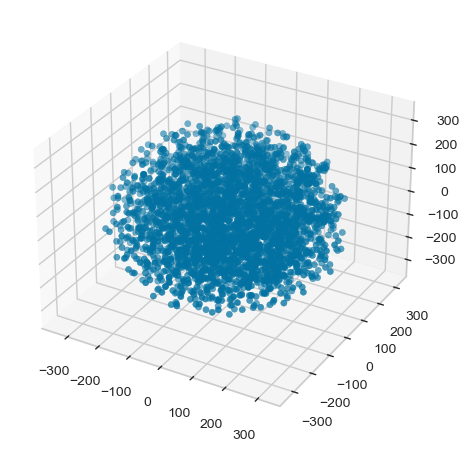

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


features = np.array(features_hog)
print(features.shape)
tsne = TSNE(n_components=3, perplexity=10, learning_rate=350, n_iter=5000, random_state=0).fit_transform(features)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(tsne[:, 0], tsne[:, 1],tsne[:,2])
# plt.scatter3D(tsne[:, 0], tsne[:, 1],tsne[:,2])
fig.show()

In [53]:
tx, ty, tz = tsne[:,0], tsne[:,1],tsne[:,2]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))
tz = (tz-np.min(tz)) / (np.max(tz) - np.min(tz))


0 -1gyxuGDs1U.png
1 -28pKoQdMl8.jpg
2 -378LN_fUqE.jpg
3 -4zrvLIvs4c.png
4 -53kaP6dZeI.jpg
5 -6BvA4U1dLI.jpg
6 -6Up7CG5d6M.jpg
7 -8pCMoL_b_s.jpg
8 -8tk0uk17gc.jpg
9 -9JQndAAvLE.jpg
10 -9kzxE3PfE8.jpg
11 -A3IlRATIsI.jpg
12 -AkTLfreP2M.png
13 -BRSus9eU10.jpg
14 -c0e7821tHs.png
15 -cPdImejxEQ.jpg
16 -dmiS_6YrGU.jpg
17 -E_TWPCkqy4.jpg
18 -fDVHJoZArg.png
19 -gal8E_dgE8.jpg
20 -gZLTLmZBGM.jpg
21 -Jl2Hc2DTKc.png
22 -k-V3ESHcfA.jpg
23 -ldA6PCa1kM.png
24 -LKVUarhtvE.jpg
25 -LqbAMHGMTk.png
26 -mgqMpWKEBk.jpg
27 -naamtpQ8lw.jpg
28 -nd7n0gqAmI.png
29 -NPmBkYb_mY.jpg
30 -nSHiHO6QJI.jpg
31 -ny03ousWJo.jpg
32 -O9qlFkYMPg.png
33 -pAOuR8s03Q.jpg
34 -q7EvLhOK08.jpg
35 -QTo3nfmWUc.png
36 -qv7k2_lc0M.jpg
37 -RCnNyD0L-s.jpg
38 -S4CwK5Z5Xg.png
39 -T-nJ2Wpw7k.png
40 -tBy2jemw4s.jpg
41 -TfgtjrXCHk.png
42 -UdWguw90g4.jpg
43 -VRx0GRo-Ws.jpg
44 -wmfpoq_Y0E.jpg
45 -Xb6JoucBXM.png
46 -xBAM1TRSKA.png
47 -XbX4eQlwgs.jpg
48 -xfra2_tVF8.jpg
49 -xl0Com4ElM.png
50 -XTnL4Mang0.jpg
51 -ybiXR2WCFQ.jpg
52 -ZgukO7zXPw.png
53 

C:\Users\rawal\AppData\Local\Temp\ipykernel_26208\531795428.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


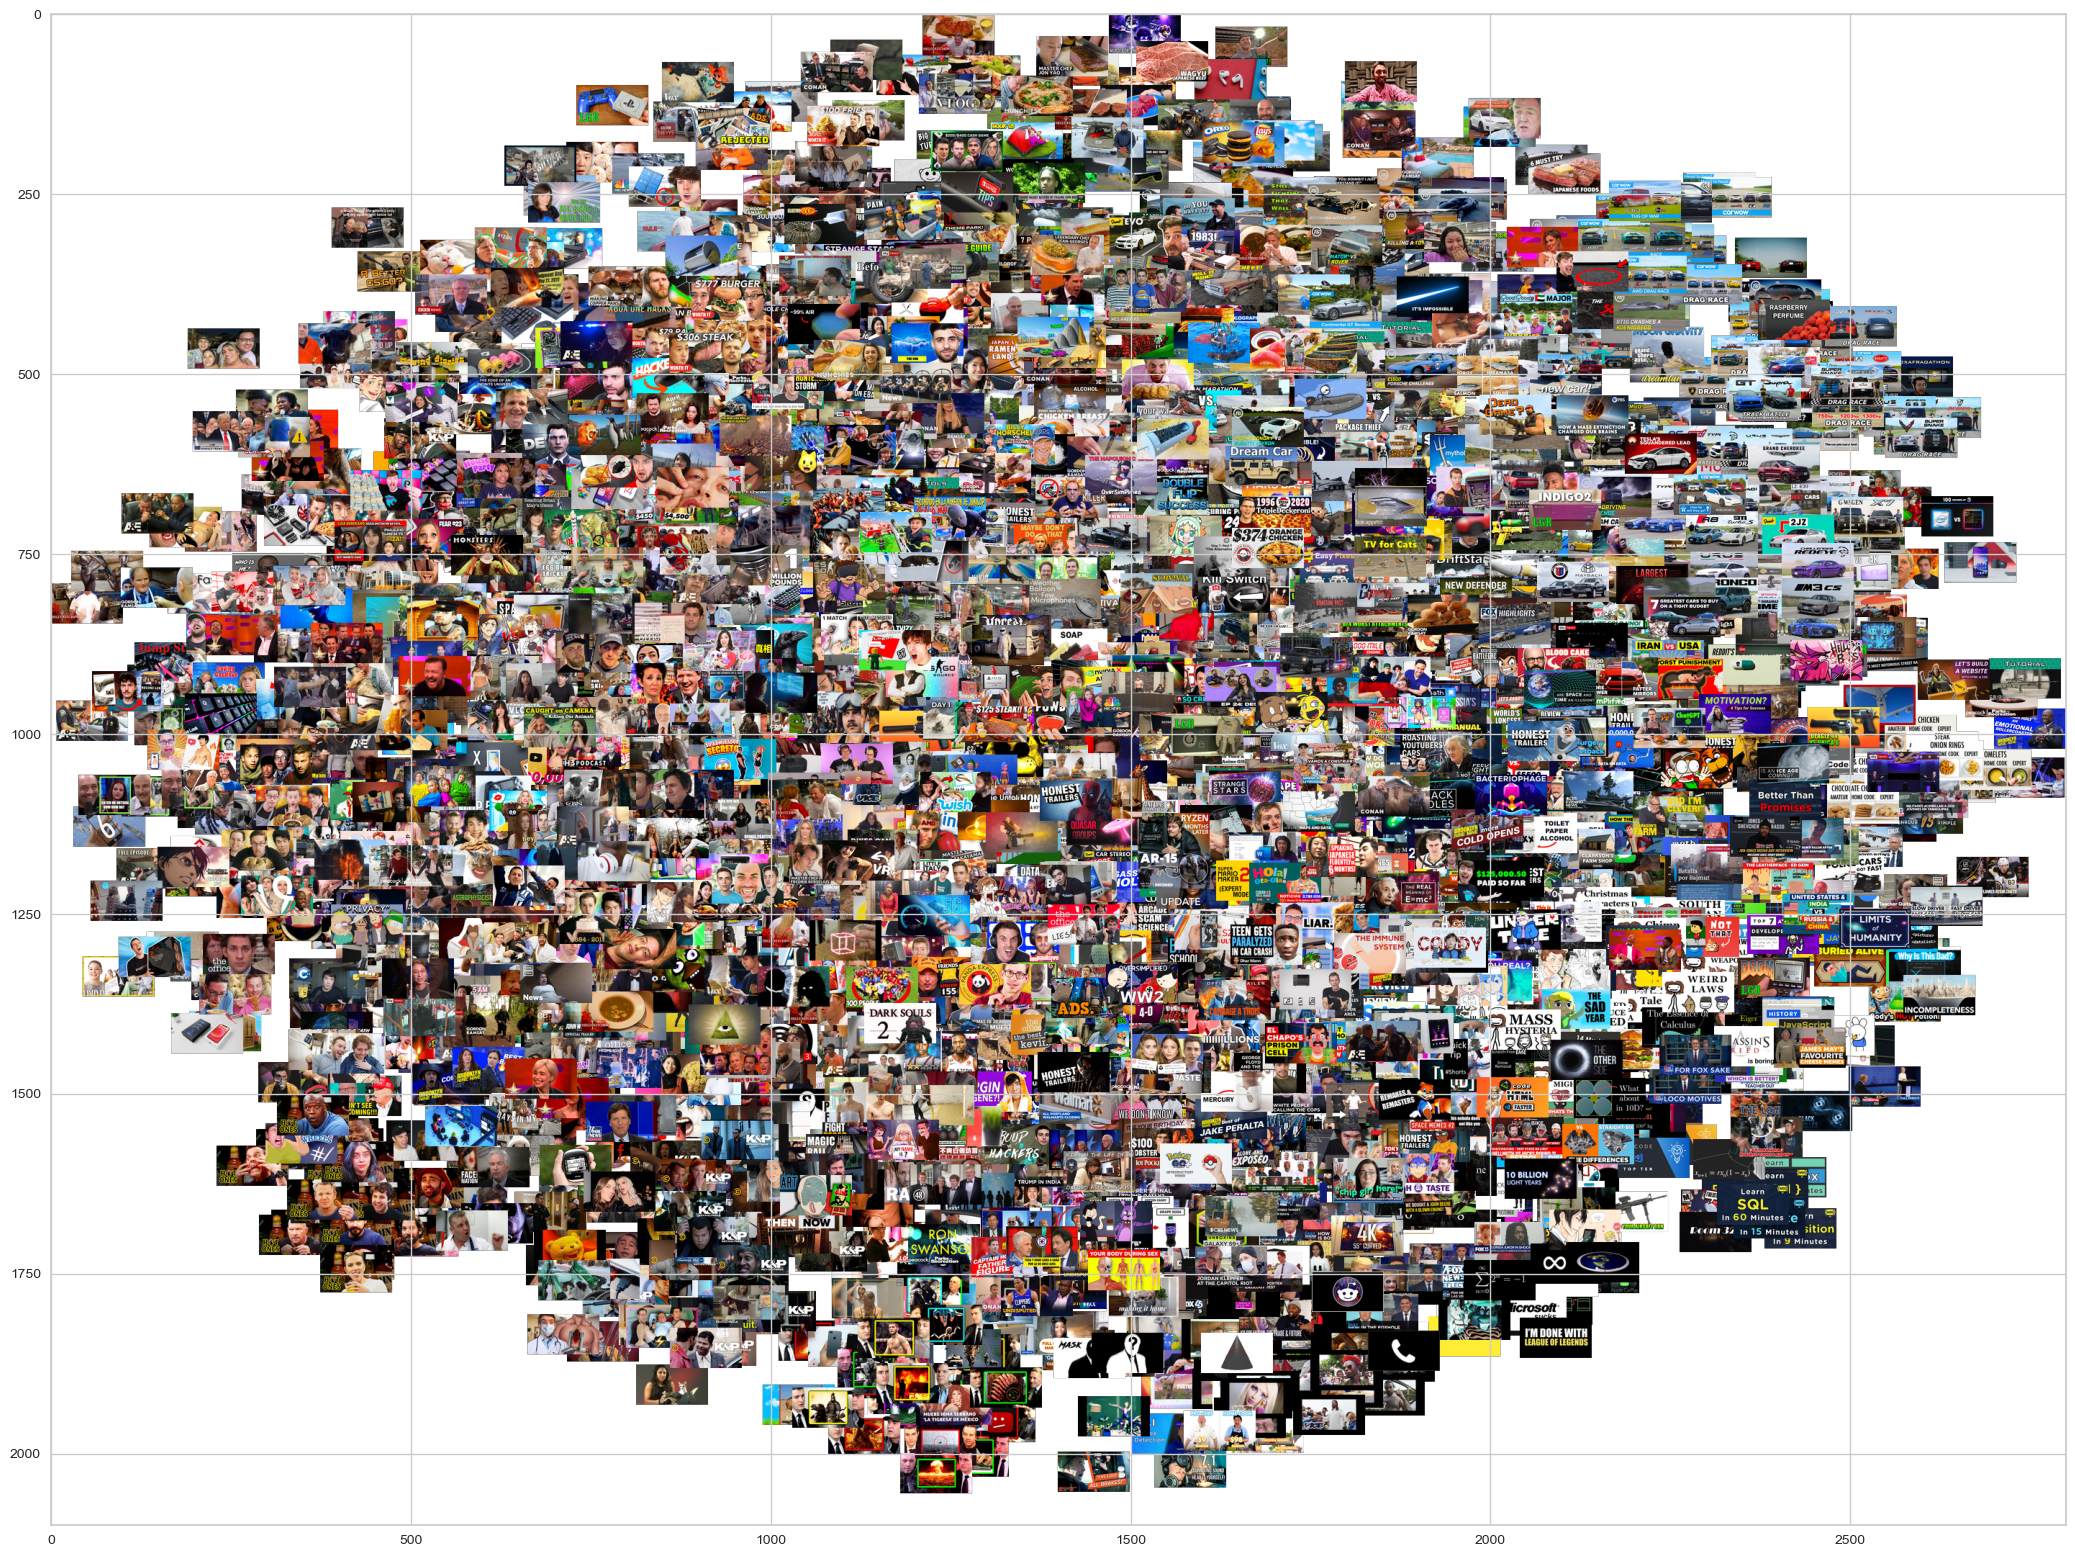

In [54]:
r = 0.7
from PIL import Image

width = int(4000*r)
height = int(3000*r)
max_dim = 100
images = []
for i, filename  in enumerate(os.listdir('dataset-v3')):
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset-v3\\'+filename)
    images.append(img)
full_image = Image.new('RGBA', (width, height))


for img, x, y in zip(images, tx, ty):
    tile = img
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (26,26))
plt.imshow(full_image)

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available t

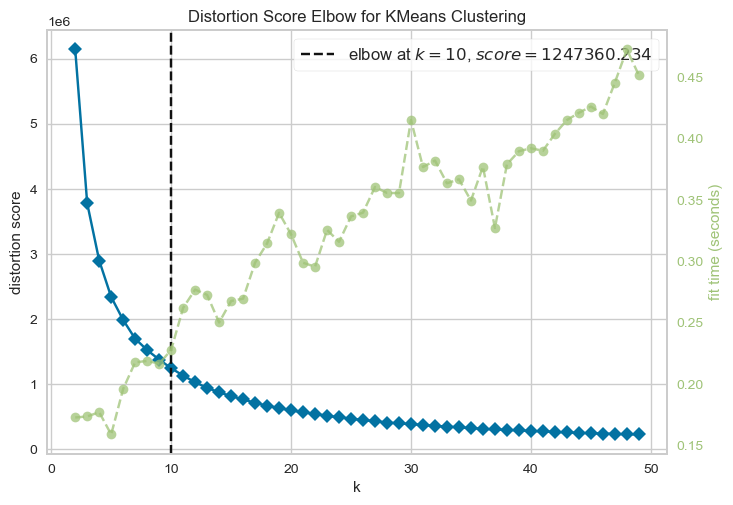

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from sklearn.cluster import KMeans,Birch
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,50))
visualizer.fit(tsne)
visualizer.show()

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
C:\Users\rawal\AppData\Local\Temp\ipykernel_26208\2552763690.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


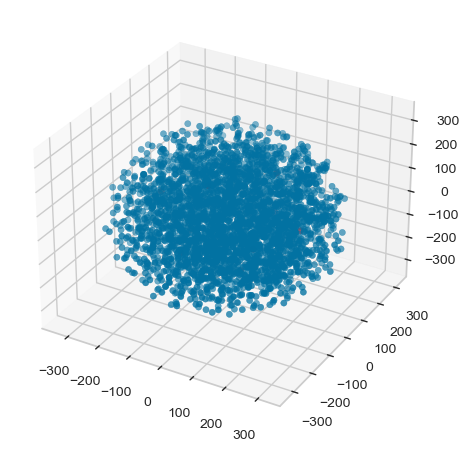

In [56]:
kmeans = KMeans(n_clusters=10,random_state=0).fit(tsne)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(tsne[:, 0], tsne[:, 1],tsne[:,2])
ax.scatter3D(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            kmeans.cluster_centers_[:, 2],
            s=20,                             # Set centroid size
            c='red')                           # Set centroid color
fig.show()


In [57]:
import pandas as pd
data = []
labels = kmeans.labels_
for i in range(0,len(tsne)):
    x = tsne[i][0]
    y = tsne[i][1]
    z = tsne[i][2]
    pred = labels[i]
    data.append(
        {
            'X' : x,
            'Y' : y,
            'Z' : z,
            'Cluster' : pred
        }
    )
# print(data)
df = pd.DataFrame(data)
df.head(10)

X           Y           Z  Cluster
0  108.652939 -245.494141   43.251057        5
1 -176.414841  108.254890 -206.468506        4
2 -163.664658    0.680485  229.783386        2
3   -3.028270   -4.782335  -82.686081        7
4  -77.316071  -36.446201   61.334385        8
5 -237.733078  194.795074   -1.211638        9
6   63.046204   63.112045 -328.125336        7
7   18.936234 -304.237640   73.461670        1
8  102.550064   44.371895 -217.093903        7
9  125.418320   37.040169 -162.969360        7

9


C:\Users\rawal\AppData\Local\Temp\ipykernel_26208\2087175435.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


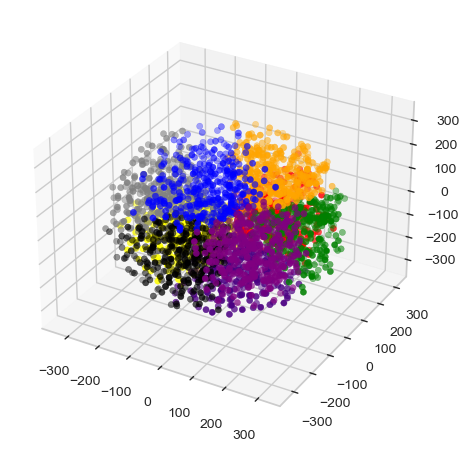

In [66]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filteredLabel = []
for i in range(0,9):
    filteredLabel.append(df.loc[df['Cluster'] == i])
print(len(filteredLabel))
# filtered_label_0 = df.loc[df['Cluster'] == 0]
# filtered_label_1 = df.loc[df['Cluster'] == 1]
# filtered_label_2 = df.loc[df['Cluster'] == 2]
# filtered_label_3 = df.loc[df['Cluster'] == 3]
# filtered_label_4 = df.loc[df['Cluster'] == 4]
# filtered_label_5 = df.loc[df['Cluster'] == 5]
# filtered_label_6 = df.loc[df['Cluster'] == 6]
# filtered_label_7 = df.loc[df['Cluster'] == 7]
# filtered_label_8 = df.loc[df['Cluster'] == 8]
# filtered_label_9 = df.loc[df['Cluster'] == 9]

# filtered_label_0.head(10)
#plotting the results
fig = plt.figure()
ax = plt.axes(projection='3d')
colors = ['red','black','blue','green','yellow','purple','orange','indigo','gray']
# print(len(colors))
for i in range(0,9):
    ax.scatter3D(filteredLabel[i]['X'],filteredLabel[i]['Y'],filteredLabel[i]['Z'],color = colors[i])
    # print(i)
# plt.scatter(filtered_label_0['X'] , filtered_label_0['Y'], color ='red')
# plt.scatter(filtered_label_1['X'] , filtered_label_1['Y'], color ='black')
# plt.scatter(filtered_label_2['X'] , filtered_label_2['Y'], color ='blue')
# plt.scatter(filtered_label_3['X'] , filtered_label_3['Y'], color ='green')
# plt.scatter(filtered_label_4['X'] , filtered_label_4['Y'], color ='yellow')
# plt.scatter(filtered_label_5['X'] , filtered_label_5['Y'], color ='purple')
# plt.scatter(filtered_label_6['X'] , filtered_label_6['Y'], color ='orange')
# plt.scatter(filtered_label_7['X'] , filtered_label_7['Y'], color ='indigo')
# plt.scatter(filtered_label_8['X'] , filtered_label_8['Y'], color ='gray')
# plt.scatter(filtered_label_9['X'] , filtered_label_9['Y'])
fig.show()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score, cohen_kappa_score, calinski_harabasz_score, davies_bouldin_score
print(davies_bouldin_score(tsne, kmeans.labels_))
print(calinski_harabasz_score(tsne, kmeans.labels_))
print(silhouette_score(tsne, kmeans.labels_))

1.0668630877705172
1008.7992070123947
0.2356358


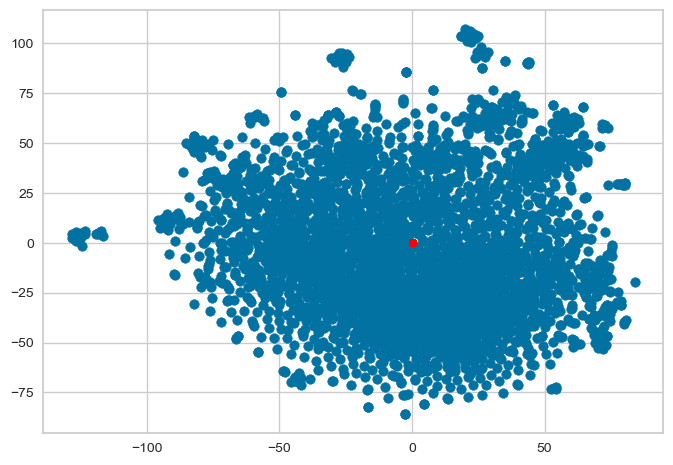

In [38]:
birch = Birch(n_clusters = 10).fit(features_hog)
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.scatter(birch.subcluster_centers_[:, 0], 
            birch.subcluster_centers_[:, 1], 
            s=20,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [39]:
import pandas as pd
data = []
labels = kmeans.labels_
for i in range(0,len(tsne)):
    x = tsne[i][0]
    y = tsne[i][1]
    pred = labels[i]
    data.append(
        {
            'X' : x,
            'Y' : y,
            'Cluster' : pred
        }
    )
# print(data)
df_birch = pd.DataFrame(data)
df_birch.head(10)

X          Y  Cluster
0   20.597254 -42.394985        8
1  -40.153072 -31.930490        0
2  -33.364922 -12.036642        3
3   -0.112834 -20.179140        4
4  -36.923733 -34.408550        0
5 -125.844383   3.843866        7
6  -58.499081 -34.527187        3
7   18.302759 -41.359005        8
8   37.419308  11.074537        9
9   14.273788  -5.765682        4

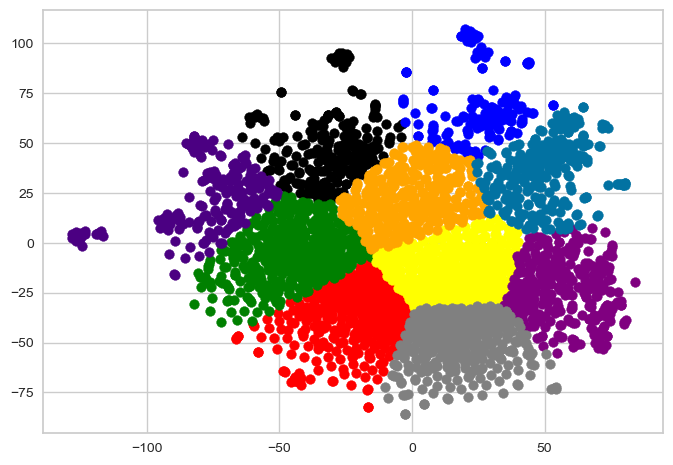

In [40]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label_0 = df_birch.loc[df_birch['Cluster'] == 0]
filtered_label_1 = df_birch.loc[df_birch['Cluster'] == 1]
filtered_label_2 = df_birch.loc[df_birch['Cluster'] == 2]
filtered_label_3 = df_birch.loc[df_birch['Cluster'] == 3]
filtered_label_4 = df_birch.loc[df_birch['Cluster'] == 4]
filtered_label_5 = df_birch.loc[df_birch['Cluster'] == 5]
filtered_label_6 = df_birch.loc[df_birch['Cluster'] == 6]
filtered_label_7 = df_birch.loc[df_birch['Cluster'] == 7]
filtered_label_8 = df_birch.loc[df_birch['Cluster'] == 8]
filtered_label_9 = df_birch.loc[df_birch['Cluster'] == 9]

# filtered_label_0.head(10)
#plotting the results
plt.scatter(filtered_label_0['X'] , filtered_label_0['Y'], color ='red')
plt.scatter(filtered_label_1['X'] , filtered_label_1['Y'], color ='black')
plt.scatter(filtered_label_2['X'] , filtered_label_2['Y'], color ='blue')
plt.scatter(filtered_label_3['X'] , filtered_label_3['Y'], color ='green')
plt.scatter(filtered_label_4['X'] , filtered_label_4['Y'], color ='yellow')
plt.scatter(filtered_label_5['X'] , filtered_label_5['Y'], color ='purple')
plt.scatter(filtered_label_6['X'] , filtered_label_6['Y'], color ='orange')
plt.scatter(filtered_label_7['X'] , filtered_label_7['Y'], color ='indigo')
plt.scatter(filtered_label_8['X'] , filtered_label_8['Y'], color ='gray')
plt.scatter(filtered_label_9['X'] , filtered_label_9['Y'])
plt.show()